## Simple Linear Regression

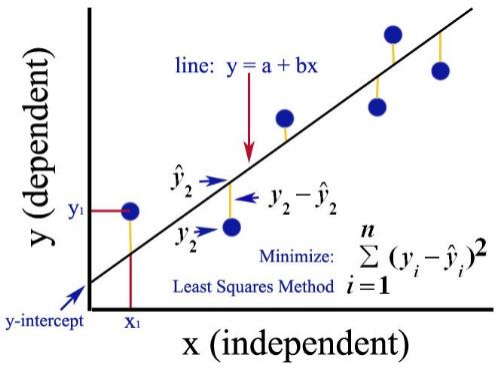

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
# To check for any duplicated rows
df.duplicated().sum()

0

### PROFIT ~ RND
### PROFIT = B0 + B1*RND

<Axes: xlabel='RND', ylabel='PROFIT'>

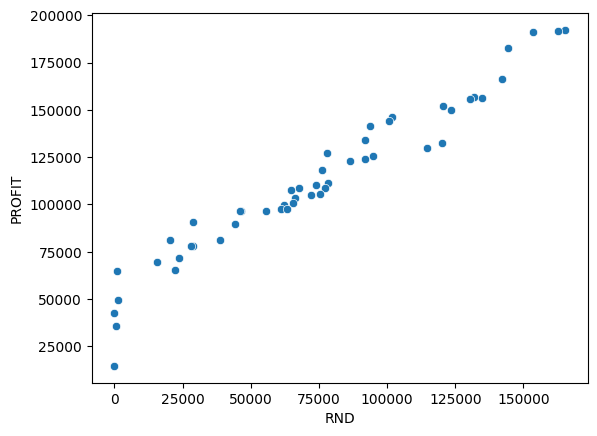

In [9]:
import seaborn as sns
sns.scatterplot(data=df,x='RND',y='PROFIT')

In [10]:
X = df[['RND']]
Y = df[['PROFIT']]

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [13]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### Get model coeff and intercept

In [15]:
#B1 value

model.coef_

array([[0.85429137]])

In [16]:
#B0 value

model.intercept_

array([49032.89914125])

### Visualize the Reg Line

<Axes: xlabel='RND', ylabel='PROFIT'>

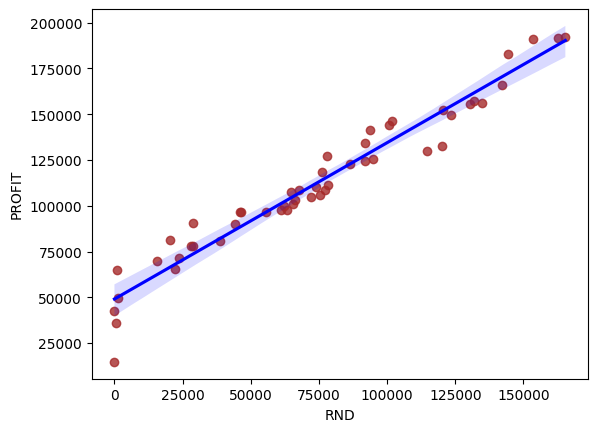

In [30]:
# line_kws = to give color to line
# ci = confidence interval
sns.regplot(data=df,x='RND',y='PROFIT',color='brown',line_kws={'color':'blue'},ci=99)

## Predicting out sample data

In [38]:
rnd = [[100000]]
profit_pred = model.predict(rnd)
profit_pred

array([[134462.03623513]])

In [39]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Model Evaluation

## Metrics of evaluation

1. Mean Squarred Error (MSE)
2. Root Mean Squarred Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R-Squared > .8

In [50]:
# MSE
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error


In [51]:
ypred = model.predict(X)
ypred[:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [52]:
mse = mean_squared_error(Y,ypred)
mse

85120931.32706906

In [53]:
rmse = root_mean_squared_error(Y,ypred)
rmse

9226.100548285232

In [54]:
mae = mean_absolute_error(Y,ypred)
mae

6910.98435457961

In [55]:
mape = mean_absolute_percentage_error(Y,ypred)
mape

0.11070141081984847

In [56]:
# R2 score - 2 methods
# 1. Using model.score()
# 2. Using r2_score()

In [57]:
from sklearn.metrics import r2_score

In [58]:
# 1. Using score()
model.score(X,Y)

0.9465353160804393

In [59]:
# 2. r2_score()
r2_score(Y,ypred)

0.9465353160804393

### Because R2 score > 0.8 the model built is good and can be used further for out of sample predictions